In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score


In [3]:
data = pd.read_csv('./data/train.csv')
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.drop(columns=["Id"], inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
data.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
X = data.drop("SalePrice", axis=1)
"SalePrice" in X.columns

False

In [8]:
y = data["SalePrice"]
type(y)


pandas.core.series.Series

In [9]:
numeric_features = X.select_dtypes(include=['float64', "int64"]).columns
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [10]:
X_num = X[numeric_features]
X_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [11]:
X_num_train, X_num_val, y_num_train, y_num_val = train_test_split(X_num, y, test_size=0.2, random_state=42)

In [12]:
y_num_train.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

In [13]:
len(X_num_train) / len(X), len(X_num_val) / len(X)

(0.8, 0.2)

In [14]:
len(y_num_train) / len(y), len(y_num_val) / len(y)

(0.8, 0.2)

In [15]:
imputer = SimpleImputer(strategy="median")
X_num_train = imputer.fit_transform(X_num_train)
X_num_train


array([[2.000e+01, 7.000e+01, 8.400e+03, ..., 0.000e+00, 6.000e+00,
        2.010e+03],
       [6.000e+01, 5.900e+01, 7.837e+03, ..., 0.000e+00, 5.000e+00,
        2.009e+03],
       [3.000e+01, 6.700e+01, 8.777e+03, ..., 0.000e+00, 5.000e+00,
        2.008e+03],
       ...,
       [2.000e+01, 6.000e+01, 8.172e+03, ..., 0.000e+00, 4.000e+00,
        2.006e+03],
       [5.000e+01, 5.500e+01, 7.642e+03, ..., 0.000e+00, 6.000e+00,
        2.007e+03],
       [1.200e+02, 5.300e+01, 3.684e+03, ..., 0.000e+00, 6.000e+00,
        2.009e+03]])

In [16]:
X_num_train = pd.DataFrame(X_num_train, columns=numeric_features)
X_num_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   float64
 1   LotFrontage    1168 non-null   float64
 2   LotArea        1168 non-null   float64
 3   OverallQual    1168 non-null   float64
 4   OverallCond    1168 non-null   float64
 5   YearBuilt      1168 non-null   float64
 6   YearRemodAdd   1168 non-null   float64
 7   MasVnrArea     1168 non-null   float64
 8   BsmtFinSF1     1168 non-null   float64
 9   BsmtFinSF2     1168 non-null   float64
 10  BsmtUnfSF      1168 non-null   float64
 11  TotalBsmtSF    1168 non-null   float64
 12  1stFlrSF       1168 non-null   float64
 13  2ndFlrSF       1168 non-null   float64
 14  LowQualFinSF   1168 non-null   float64
 15  GrLivArea      1168 non-null   float64
 16  BsmtFullBath   1168 non-null   float64
 17  BsmtHalfBath   1168 non-null   float64
 18  FullBath

In [17]:
X_num_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [18]:
merge_train_data = pd.concat([X_num_train, y_num_train], axis = 1)
merge_train_data.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,0.0,...,250.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,208500.0
1,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0,181500.0
2,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,0.0,...,328.0,0.0,164.0,0.0,0.0,0.0,0.0,5.0,2008.0,223500.0
3,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,0.0,...,0.0,0.0,264.0,0.0,0.0,0.0,0.0,6.0,2007.0,140000.0
4,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,0.0,...,0.0,0.0,242.0,0.0,0.0,0.0,0.0,5.0,2010.0,250000.0


In [19]:
merge_train_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.342930,-0.116501,0.029719,-0.052768,-0.001928,0.036081,-0.013443,-0.080944,-0.074205,...,-0.022712,-0.011753,-0.008086,-0.058672,-0.033155,0.003578,-0.006216,-0.014139,-0.028758,0.006606
LotFrontage,-0.342930,1.000000,0.299038,0.230396,-0.046081,0.117647,0.084741,0.202219,0.218538,0.054379,...,0.066616,0.129281,-0.004139,0.074079,0.048016,0.209966,-0.000248,0.021718,0.002692,0.021717
LotArea,-0.116501,0.299038,1.000000,0.102088,0.001625,0.013541,0.017216,0.126098,0.224270,0.122366,...,0.177537,0.086320,-0.024948,0.023200,0.046353,0.086463,0.038358,0.003973,-0.005098,0.000151
OverallQual,0.029719,0.230396,0.102088,1.000000,-0.087599,0.558124,0.538251,0.413083,0.204864,-0.050637,...,0.232991,0.288691,-0.121967,0.025278,0.060840,0.079182,-0.032040,0.053355,-0.017635,-0.045224
OverallCond,-0.052768,-0.046081,0.001625,-0.087599,1.000000,-0.386268,0.055034,-0.141681,-0.043388,0.047532,...,-0.007352,-0.029882,0.067696,0.017296,0.057537,-0.007496,0.077016,0.007975,0.023782,-0.039104
YearBuilt,-0.001928,0.117647,0.013541,0.558124,-0.386268,1.000000,0.587311,0.313444,0.223348,-0.051112,...,0.217083,0.176241,-0.392513,0.029117,-0.047356,0.004362,-0.033683,0.006257,0.000670,-0.067557
YearRemodAdd,0.036081,0.084741,0.017216,0.538251,0.055034,0.587311,1.000000,0.155912,0.104648,-0.068891,...,0.211789,0.224053,-0.205697,0.042385,-0.060476,0.011388,-0.006076,0.025142,0.046533,-0.046770
MasVnrArea,-0.013443,0.202219,0.126098,0.413083,-0.141681,0.313444,0.155912,1.000000,0.242777,-0.069435,...,0.165918,0.118193,-0.126980,0.031725,0.058899,0.022075,-0.031352,0.001665,0.004454,-0.016440
BsmtFinSF1,-0.080944,0.218538,0.224270,0.204864,-0.043388,0.223348,0.104648,0.242777,1.000000,-0.043652,...,0.189172,0.092833,-0.115216,0.027128,0.054527,0.165951,0.004168,-0.011884,0.032167,-0.018195
BsmtFinSF2,-0.074205,0.054379,0.122366,-0.050637,0.047532,-0.051112,-0.068891,-0.069435,-0.043652,1.000000,...,0.069764,0.022075,0.055100,-0.030294,0.115927,0.055403,0.008115,-0.016695,0.040306,0.034236


In [20]:
merge_train_data.corr()["SalePrice"]

MSSubClass       0.006606
LotFrontage      0.021717
LotArea          0.000151
OverallQual     -0.045224
OverallCond     -0.039104
YearBuilt       -0.067557
YearRemodAdd    -0.046770
MasVnrArea      -0.016440
BsmtFinSF1      -0.018195
BsmtFinSF2       0.034236
BsmtUnfSF       -0.000860
TotalBsmtSF     -0.007486
1stFlrSF         0.004605
2ndFlrSF        -0.045055
LowQualFinSF    -0.034261
GrLivArea       -0.037463
BsmtFullBath     0.061052
BsmtHalfBath     0.029073
FullBath        -0.028745
HalfBath        -0.065761
BedroomAbvGr     0.018133
KitchenAbvGr     0.035609
TotRmsAbvGrd    -0.037201
Fireplaces      -0.019447
GarageYrBlt     -0.086955
GarageCars      -0.067026
GarageArea      -0.053754
WoodDeckSF      -0.004610
OpenPorchSF     -0.018798
EnclosedPorch    0.035605
3SsnPorch       -0.029458
ScreenPorch     -0.008991
PoolArea        -0.042992
MiscVal         -0.020344
MoSold           0.081599
YrSold           0.025038
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [21]:
merge_train_data.corr()["SalePrice"].abs()


MSSubClass       0.006606
LotFrontage      0.021717
LotArea          0.000151
OverallQual      0.045224
OverallCond      0.039104
YearBuilt        0.067557
YearRemodAdd     0.046770
MasVnrArea       0.016440
BsmtFinSF1       0.018195
BsmtFinSF2       0.034236
BsmtUnfSF        0.000860
TotalBsmtSF      0.007486
1stFlrSF         0.004605
2ndFlrSF         0.045055
LowQualFinSF     0.034261
GrLivArea        0.037463
BsmtFullBath     0.061052
BsmtHalfBath     0.029073
FullBath         0.028745
HalfBath         0.065761
BedroomAbvGr     0.018133
KitchenAbvGr     0.035609
TotRmsAbvGrd     0.037201
Fireplaces       0.019447
GarageYrBlt      0.086955
GarageCars       0.067026
GarageArea       0.053754
WoodDeckSF       0.004610
OpenPorchSF      0.018798
EnclosedPorch    0.035605
3SsnPorch        0.029458
ScreenPorch      0.008991
PoolArea         0.042992
MiscVal          0.020344
MoSold           0.081599
YrSold           0.025038
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [22]:
merge_train_data.corr()["SalePrice"].abs().sort_values()


LotArea          0.000151
BsmtUnfSF        0.000860
1stFlrSF         0.004605
WoodDeckSF       0.004610
MSSubClass       0.006606
TotalBsmtSF      0.007486
ScreenPorch      0.008991
MasVnrArea       0.016440
BedroomAbvGr     0.018133
BsmtFinSF1       0.018195
OpenPorchSF      0.018798
Fireplaces       0.019447
MiscVal          0.020344
LotFrontage      0.021717
YrSold           0.025038
FullBath         0.028745
BsmtHalfBath     0.029073
3SsnPorch        0.029458
BsmtFinSF2       0.034236
LowQualFinSF     0.034261
EnclosedPorch    0.035605
KitchenAbvGr     0.035609
TotRmsAbvGrd     0.037201
GrLivArea        0.037463
OverallCond      0.039104
PoolArea         0.042992
2ndFlrSF         0.045055
OverallQual      0.045224
YearRemodAdd     0.046770
GarageArea       0.053754
BsmtFullBath     0.061052
HalfBath         0.065761
GarageCars       0.067026
YearBuilt        0.067557
MoSold           0.081599
GarageYrBlt      0.086955
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [23]:

correlation_num_features = merge_train_data.corr()["SalePrice"].abs().sort_values(ascending=False)
correlation_num_features


SalePrice        1.000000
GarageYrBlt      0.086955
MoSold           0.081599
YearBuilt        0.067557
GarageCars       0.067026
HalfBath         0.065761
BsmtFullBath     0.061052
GarageArea       0.053754
YearRemodAdd     0.046770
OverallQual      0.045224
2ndFlrSF         0.045055
PoolArea         0.042992
OverallCond      0.039104
GrLivArea        0.037463
TotRmsAbvGrd     0.037201
KitchenAbvGr     0.035609
EnclosedPorch    0.035605
LowQualFinSF     0.034261
BsmtFinSF2       0.034236
3SsnPorch        0.029458
BsmtHalfBath     0.029073
FullBath         0.028745
YrSold           0.025038
LotFrontage      0.021717
MiscVal          0.020344
Fireplaces       0.019447
OpenPorchSF      0.018798
BsmtFinSF1       0.018195
BedroomAbvGr     0.018133
MasVnrArea       0.016440
ScreenPorch      0.008991
TotalBsmtSF      0.007486
MSSubClass       0.006606
WoodDeckSF       0.004610
1stFlrSF         0.004605
BsmtUnfSF        0.000860
LotArea          0.000151
Name: SalePrice, dtype: float64

In [24]:
selected_num_features = correlation_num_features.index[1:10]
selected_num_features

Index(['GarageYrBlt', 'MoSold', 'YearBuilt', 'GarageCars', 'HalfBath',
       'BsmtFullBath', 'GarageArea', 'YearRemodAdd', 'OverallQual'],
      dtype='object')

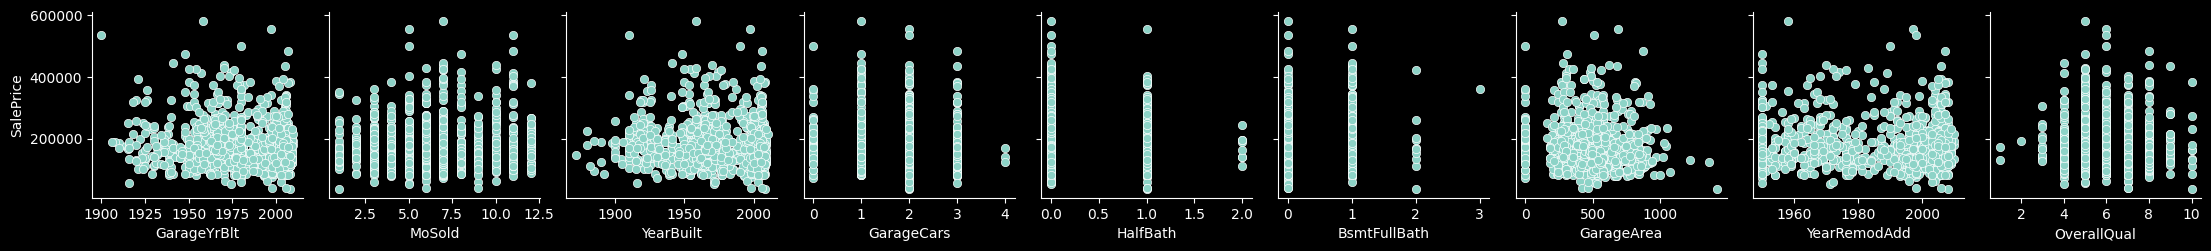

In [25]:
# https://www.geeksforgeeks.org/python-seaborn-pairplot-method/
sns.pairplot(
    data = merge_train_data,
    y_vars = ["SalePrice"],
    x_vars = selected_num_features,
)
plt.show()

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [27]:
reg = LinearRegression()


In [28]:
X_num_selected = X_num_train["OverallQual"]
X_num_selected


0       5.0
1       6.0
2       5.0
3       5.0
4       5.0
       ... 
1163    6.0
1164    4.0
1165    5.0
1166    7.0
1167    7.0
Name: OverallQual, Length: 1168, dtype: float64

In [29]:
y_num_train


254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [30]:
X_num_vector = X_num_selected.values.reshape(-1, 1)

In [31]:
reg.fit(X_num_vector, y_num_train)


LinearRegression()

In [32]:
y_pred = reg.predict(X_num_vector)
y_pred


array([131666.16545463, 176046.04312562, 131666.16545463, ...,
       131666.16545463, 220425.9207966 , 220425.9207966 ])

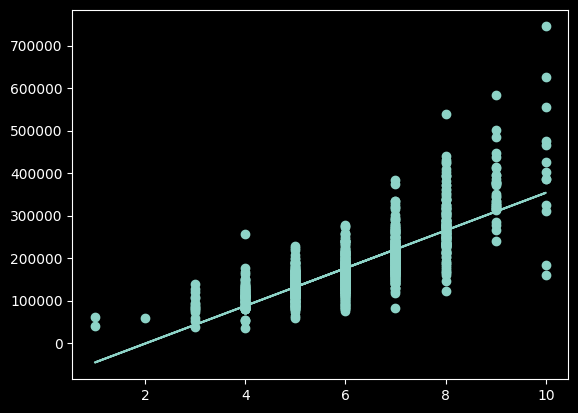

In [33]:
import matplotlib.pyplot as plt

plt.scatter(X_num_vector, y_num_train)
plt.plot(X_num_vector, y_pred)
plt.show()


In [34]:
reg.coef_

array([44379.87767098])

In [35]:
reg.intercept_

np.float64(-90233.22290028064)

In [36]:
y_pred

array([131666.16545463, 176046.04312562, 131666.16545463, ...,
       131666.16545463, 220425.9207966 , 220425.9207966 ])

In [37]:
y_num_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [38]:
np.mean(np.abs(y_num_train - y_pred))

np.float64(33628.12370728996)

In [39]:
X_num_val.isnull().sum()


MSSubClass        0
LotFrontage      42
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        2
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      17
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [40]:
X_num_val = imputer.fit_transform(X_num_val)
X_num_val


array([[2.0000e+01, 7.0000e+01, 8.4140e+03, ..., 0.0000e+00, 2.0000e+00,
        2.0060e+03],
       [6.0000e+01, 9.8000e+01, 1.2256e+04, ..., 0.0000e+00, 4.0000e+00,
        2.0100e+03],
       [3.0000e+01, 5.6000e+01, 8.9600e+03, ..., 0.0000e+00, 3.0000e+00,
        2.0100e+03],
       ...,
       [6.0000e+01, 6.3000e+01, 8.1990e+03, ..., 0.0000e+00, 1.0000e+01,
        2.0080e+03],
       [7.0000e+01, 6.0000e+01, 9.0840e+03, ..., 0.0000e+00, 1.0000e+01,
        2.0090e+03],
       [2.0000e+01, 7.0000e+01, 8.1200e+03, ..., 0.0000e+00, 7.0000e+00,
        2.0090e+03]])

In [41]:
X_num_val = pd.DataFrame(X_num_val, columns = numeric_features)
X_num_val


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20.0,70.0,8414.0,6.0,8.0,1963.0,2003.0,0.0,663.0,0.0,...,264.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0
1,60.0,98.0,12256.0,8.0,5.0,1994.0,1995.0,362.0,1032.0,0.0,...,712.0,186.0,32.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
2,30.0,56.0,8960.0,5.0,6.0,1927.0,1950.0,0.0,0.0,0.0,...,360.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,50.0,50.0,5000.0,6.0,7.0,1947.0,1950.0,0.0,399.0,0.0,...,420.0,0.0,24.0,36.0,0.0,0.0,0.0,0.0,10.0,2006.0
4,20.0,89.0,12898.0,9.0,5.0,2007.0,2008.0,70.0,1022.0,0.0,...,912.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,30.0,50.0,5925.0,4.0,7.0,1937.0,2000.0,435.0,168.0,0.0,...,672.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0
288,20.0,124.0,16158.0,7.0,5.0,2005.0,2005.0,16.0,1274.0,0.0,...,430.0,168.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0
289,60.0,63.0,8199.0,7.0,5.0,2005.0,2005.0,0.0,648.0,0.0,...,410.0,36.0,18.0,0.0,0.0,0.0,0.0,0.0,10.0,2008.0
290,70.0,60.0,9084.0,4.0,5.0,1940.0,1950.0,0.0,0.0,0.0,...,296.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0


In [42]:
X_num_val.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    float64
 1   LotFrontage    292 non-null    float64
 2   LotArea        292 non-null    float64
 3   OverallQual    292 non-null    float64
 4   OverallCond    292 non-null    float64
 5   YearBuilt      292 non-null    float64
 6   YearRemodAdd   292 non-null    float64
 7   MasVnrArea     292 non-null    float64
 8   BsmtFinSF1     292 non-null    float64
 9   BsmtFinSF2     292 non-null    float64
 10  BsmtUnfSF      292 non-null    float64
 11  TotalBsmtSF    292 non-null    float64
 12  1stFlrSF       292 non-null    float64
 13  2ndFlrSF       292 non-null    float64
 14  LowQualFinSF   292 non-null    float64
 15  GrLivArea      292 non-null    float64
 16  BsmtFullBath   292 non-null    float64
 17  BsmtHalfBath   292 non-null    float64
 18  FullBath  

In [43]:
X_val_vector = X_num_val["OverallQual"]
X_val_vector


0      6.0
1      8.0
2      5.0
3      6.0
4      9.0
      ... 
287    4.0
288    7.0
289    7.0
290    4.0
291    4.0
Name: OverallQual, Length: 292, dtype: float64

In [44]:
X_val_vector = X_val_vector.values.reshape(-1, 1)
X_val_vector


array([[ 6.],
       [ 8.],
       [ 5.],
       [ 6.],
       [ 9.],
       [ 4.],
       [ 7.],
       [ 6.],
       [ 4.],
       [ 5.],
       [ 7.],
       [ 5.],
       [ 3.],
       [ 7.],
       [ 6.],
       [ 5.],
       [ 7.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 5.],
       [ 8.],
       [ 6.],
       [ 5.],
       [ 7.],
       [ 6.],
       [ 7.],
       [ 4.],
       [ 6.],
       [ 7.],
       [ 5.],
       [ 7.],
       [ 5.],
       [ 4.],
       [ 8.],
       [ 6.],
       [ 5.],
       [ 7.],
       [ 8.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 5.],
       [ 8.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 5.],
       [10.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 8.],
       [ 6.],
       [ 7.],
       [ 7.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 8.],
       [ 9.],
       [ 8.],
       [ 6.],
       [ 5.],
       [ 8.],
       [ 5.],
       [ 6.],
       [ 5.],
      

In [45]:
y_val_pred = reg.predict(X_val_vector)


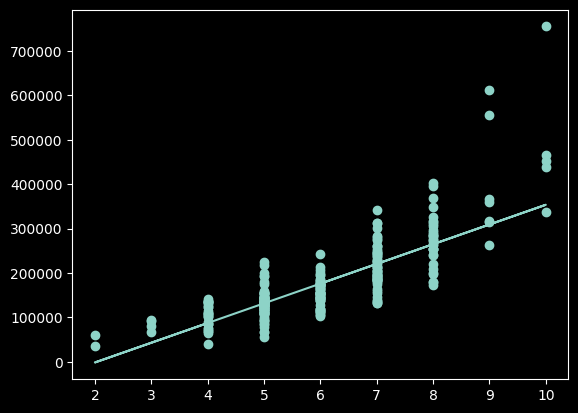

In [46]:
plt.scatter(X_val_vector, y_num_val)
plt.plot(X_val_vector, y_val_pred)
plt.show()

In [47]:
np.mean(np.abs(y_num_val - y_val_pred))


np.float64(33343.24208697129)

In [48]:
import xgboost as xgb

model = xgb.XGBRegressor()

In [49]:
model.fit(X_num_train, y_num_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

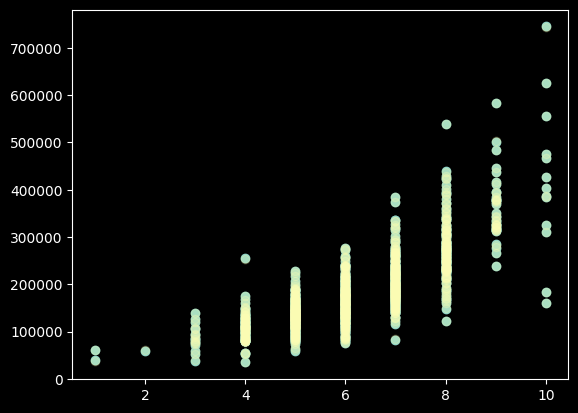

In [50]:
y_train_pred = model.predict(X_num_train)

plt.scatter(X_num_train["OverallQual"], y_num_train)
plt.scatter(X_num_train["OverallQual"], y_train_pred, alpha = 0.25)
plt.show()


In [51]:
np.mean(np.abs(y_num_train - y_train_pred))


np.float64(947.015163473887)

In [52]:
y_val_pred = model.predict(X_num_val)


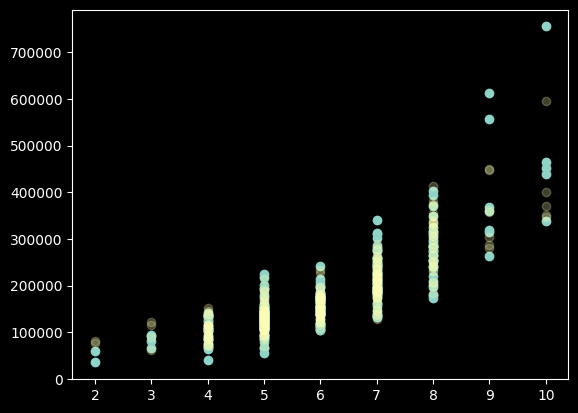

In [53]:
plt.scatter(X_num_val["OverallQual"], y_num_val)
plt.scatter(X_num_val["OverallQual"], y_val_pred, alpha = 0.25)
plt.show()


In [54]:
np.mean(np.abs(y_num_val - y_val_pred))


np.float64(18366.63310680651)